In [29]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

data_URL="https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Bike%20Sharing/day.csv"
df = pd.read_csv(data_URL)
df.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
df.shape

(731, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
df_cleaned = df.copy()

In [6]:
df_cleaned.drop('instant', axis=1, inplace=True)

In [7]:
from src.features.dates import convert_to_date

In [8]:
df_cleaned = convert_to_date(df_cleaned, ['dteday'])

In [9]:
df_cleaned['yr'] = df_cleaned['dteday'].dt.year

In [10]:
df_cleaned['mnth'] = df_cleaned['dteday'].dt.month_name()

In [11]:
df_cleaned['weekday'] = df_cleaned['dteday'].dt.day_name()

In [12]:
season_mapping = {
    1: 'winter',
    2: 'spring',
    3: 'summer',
    4: 'autumn',
}

In [13]:
df_cleaned['season'] = df_cleaned['season'].map(season_mapping)

In [14]:
weather_mapping = {
    1: 'clear',
    2: 'cloudy',
    3: 'rain',
    4: 'heavy'
}

In [15]:
df_cleaned['weathersit'] = df_cleaned['weathersit'].map(weather_mapping)

In [16]:
df_cleaned.loc[df_cleaned['dteday'] == '2011-01-01', 'holiday'] = 1

In [17]:
df_cleaned['holidaydate'] = np.nan
df_cleaned = convert_to_date(df_cleaned, ['holidaydate'])

In [18]:
holiday_mask = df_cleaned['holiday'] == 1

In [19]:
df_cleaned.loc[holiday_mask, 'holidaydate'] = df_cleaned.loc[holiday_mask, 'dteday']

In [20]:
df_cleaned['last_holiday'] = df_cleaned['holidaydate'].fillna(method='ffill')

In [21]:
df_cleaned['next_holiday'] = df_cleaned['holidaydate'].fillna(method='bfill')

In [22]:
df_cleaned['next_holiday'].fillna(pd.Timestamp('2013-01-01'), inplace=True)

In [23]:
df_cleaned['days_last_holiday'] = (df_cleaned['dteday'] - df_cleaned['last_holiday']).dt.days

In [24]:
df_cleaned['days_next_holiday'] = (df_cleaned['next_holiday'] - df_cleaned['dteday']).dt.days

In [25]:
cat_cols = ['season','mnth','holiday','weekday','workingday','weathersit'] 

In [26]:
df_cleaned = pd.get_dummies(df_cleaned, columns=cat_cols)

In [27]:
df_cleaned.drop(['dteday', 'holidaydate', 'last_holiday', 'next_holiday'], axis=1, inplace=True)

In [31]:
from src.data.sets import split_sets_by_time

X_train, y_train, X_val, y_val, X_test, y_test = split_sets_by_time(df_cleaned, 'cnt', test_ratio=0.2)

In [32]:
y_mean = y_train.mean()

In [33]:
y_base = np.full((len(y_train), 1), y_mean)

In [34]:
from src.models.performance import print_reg_perf

print_reg_perf(y_preds=y_base, y_actuals=y_train, set_name='Training')

RMSE Training: 1324.7868420297616
MAE Training: 1132.7364532147508


In [36]:
df_cleaned = df.copy()

In [37]:
from src.features.dates import convert_to_date

df_cleaned = convert_to_date(df_cleaned, ['dteday'])

In [38]:
prophet_df = df_cleaned[['dteday', 'cnt']]

In [39]:
prophet_df.columns = ['ds', 'y']

In [40]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [41]:
prophet = Prophet()

In [42]:
prophet.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
future = prophet.make_future_dataframe(freq='D', periods=30*6)

In [44]:
forecast = prophet.predict(future)

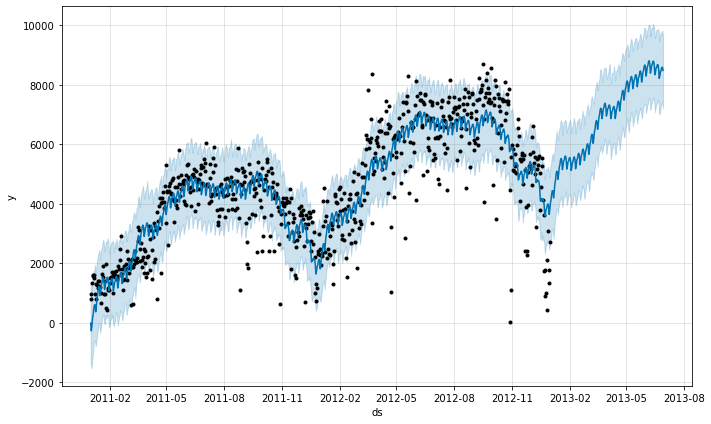

In [45]:
fig1 = prophet.plot(forecast)

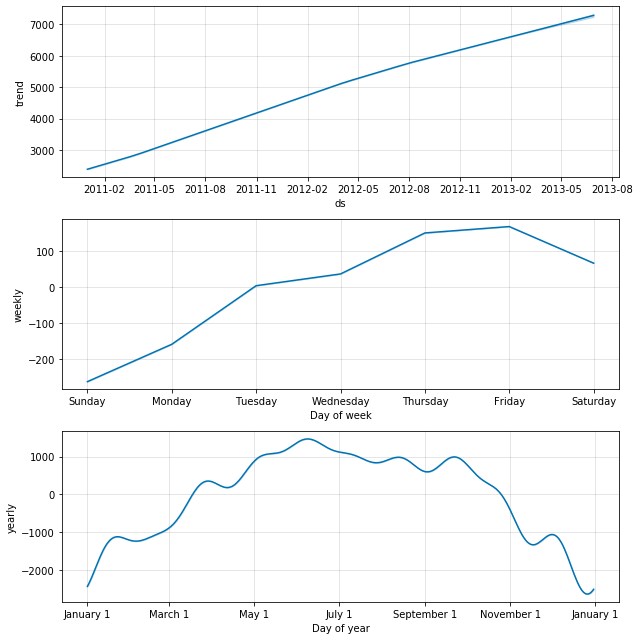

In [47]:
fig2 = prophet.plot_components(forecast)

In [48]:
from fbprophet.diagnostics import cross_validation

In [49]:
cv_results = cross_validation(prophet, initial='365 days', period='7 days', horizon='7 days')

INFO:fbprophet:Making 52 forecasts with cutoffs between 2012-01-02 00:00:00 and 2012-12-24 00:00:00


In [50]:
from fbprophet.diagnostics import performance_metrics

In [51]:
metrics_results = performance_metrics(cv_results)

In [52]:
from fbprophet.plot import plot_cross_validation_metric

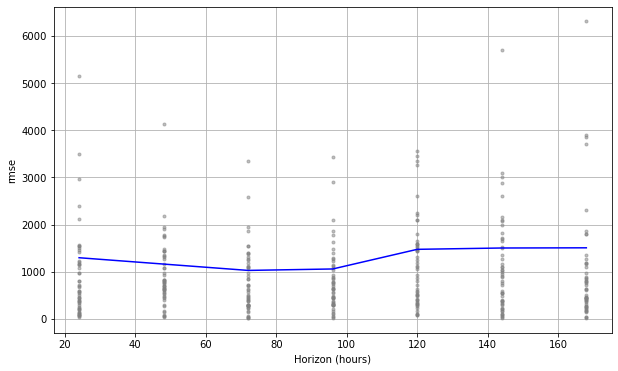

In [53]:
fig3 = plot_cross_validation_metric(cv_results, metric='rmse')